In [1]:
import re, os
from datetime import datetime
import shutil
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# pd.set_option('display.mpl_style', 'default')
pd.set_option('plotting.matplotlib.register_converters', 'default')
%matplotlib inline
plt.style.use('ggplot')
sns.set_color_codes("pastel")

In [3]:
test_folder = 'data'
files = [ f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder,f)) and f.find('.csv')>0 ]
print('at', test_folder, ', found', len(files), 'log files: ', files)

at data , found 13 log files:  ['user_errors_0000.csv', 'user_errors_0014.csv', 'user_errors_0013.csv', 'user_errors_0012.csv', 'user_errors_0001.csv', 'user_errors_0006.csv', 'user_errors_0002.csv', 'user_errors_0015.csv', 'user_errors_0010.csv', 'user_errors_0008.csv', 'user_errors_0011.csv', 'user_errors_0007.csv', 'user_errors_0009.csv']


pick user to load from the file list above

In [4]:
usr = '0009'

In [5]:
with open(os.path.join('data', 'user_errors_' + usr + '.csv'), 'rt') as f:
    udf = pd.read_csv(f, index_col='time')

In [6]:
udf.head()

,user,uj,step,cycle,error type,error cause,cause message/ddi
time,,,,,,,
2018-01-29 01:46:29,9,Open and Assign CM WO as Supervisor,Select WO,0,500,500,NaN
2018-01-29 02:57:04,9,Open and Assign CM WO as Supervisor,Save,46,Success Validation Failure,operation resulted in a table with zero rows,searchterm: Record has been saved.
2018-01-29 04:01:16,9,Open and Assign CM WO as Supervisor,Save,88,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...
2018-01-29 04:56:36,9,Open and Assign CM WO as Supervisor,Save,126,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...
2018-01-29 05:11:33,9,Open and Assign CM WO as Supervisor,Save,136,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...


In [8]:
udf.index = pd.to_datetime(udf.index, errors='coerce')

In [10]:
udf[datetime(2018, 1, 29, 9, 40):]

,user,uj,step,cycle,error type,error cause,cause message/ddi
time,,,,,,,
2018-01-29 09:40:21,9,Open and Assign CM WO as Supervisor,Select WO,512,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3
2018-01-29 09:41:00,9,Open and Assign CM WO as Supervisor,Select WO,513,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3
2018-01-29 09:41:26,9,Open and Assign CM WO as Supervisor,Select WO,514,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3
2018-01-29 09:42:08,9,Open and Assign CM WO as Supervisor,Select WO,515,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3
2018-01-29 09:42:35,9,Open and Assign CM WO as Supervisor,Select WO,516,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3


In [11]:
try:
    udf[datetime(2018, 1, 29, 9, 41, 26)]
except KeyError:
    print('KeyError: datetime.datetime(2018, 1, 29, 9, 41, 26)')

KeyError: datetime.datetime(2018, 1, 29, 9, 41, 26)


In [12]:
try:
    udf[pd.to_datetime('2018-01-29 09:41:26', errors='coerce')]
except KeyError:
    print("KeyError: Timestamp('2018-01-29 09:41:26')")

KeyError: Timestamp('2018-01-29 09:41:26')


In [13]:
udf[datetime(2018, 1, 29, 9, 41, 26):datetime(2018, 1, 29, 9, 41, 27)]

,user,uj,step,cycle,error type,error cause,cause message/ddi
time,,,,,,,
2018-01-29 09:41:26,9,Open and Assign CM WO as Supervisor,Select WO,514,Response DD Extraction Failure,Response DD Extraction Failure,Open and Assign CM WO as Supervisor ID 3


It seems to be working. The key factors are:
* errors='coerce'
* udf.index = 
* lookup references should be done by range of datetimes !

The double rows for column names is rather a quirk of the "pretty print" in Jupyter, since `udf.columns.nlevels` returns 1

In [14]:
udf.columns.nlevels

1

-----------------------------------------

In [15]:
# from pandas.tseries import converter as pdtc
# import matplotlib.units as munits
# import numpy as np

# munits.registry[np.datetime64] = pdtc.DatetimeConverter()

In [16]:
def plotit(df, plot_params):
    
    fig, ax1 = plt.subplots()

    # ax2 = ax1.twinx()
    ax1.plot(df.index, df['user'], 'b-')
    # ax2.plot(df.index, df['distance'], 'b-')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Errors', color='b')
    # ax2.set_ylabel('Distance', color='g')


    plt.show()
    plt.rcParams['figure.figsize'] = 15,9
    # df.plot(**plot_params);

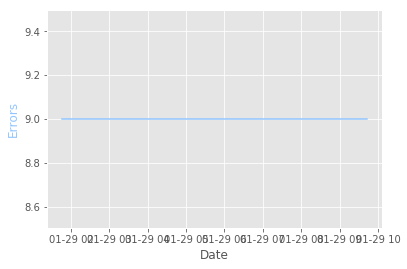

In [17]:
period = 'h'
plot_params = {'kind': 'bar', 'title' : 'errors per ' + period, 'figsize': (15, 9) }#  'style': ['-.'], }
plotit(udf, plot_params)

In [18]:
hdf = pd.DataFrame()
hdf['user'] = udf.user.resample('H').count()
hdf

,user
time,
2018-01-29 01:00:00,1
2018-01-29 02:00:00,1
2018-01-29 03:00:00,0
2018-01-29 04:00:00,2
2018-01-29 05:00:00,3
2018-01-29 06:00:00,53
2018-01-29 07:00:00,103
2018-01-29 08:00:00,100
2018-01-29 09:00:00,74


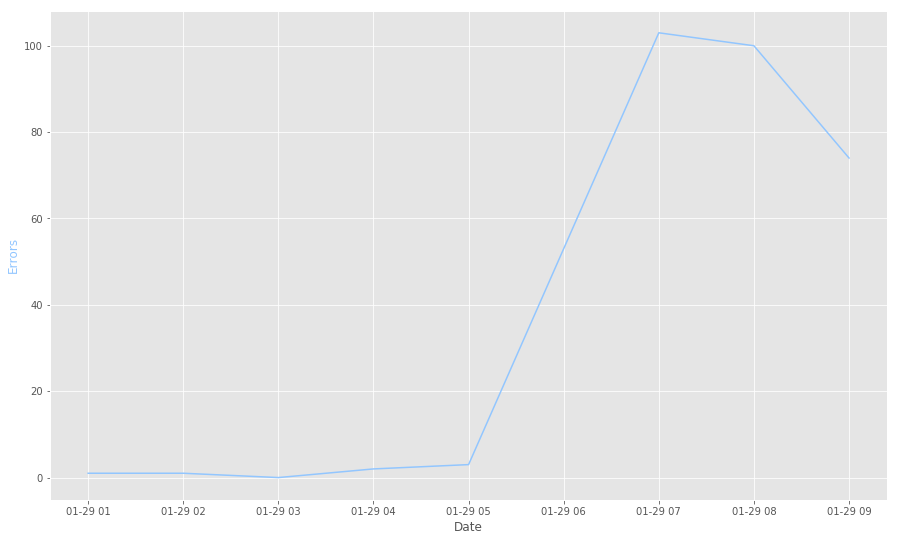

In [19]:
plotit(hdf, None)

In [46]:
def barit(df, bar_width_apparently_in_days=0.04):
    
    print('bar width:', bar_width_apparently_in_days)
    
    fig, ax1 = plt.subplots()

    # ax2 = ax1.twinx()
    ax1.bar(df.index, df['user'], width=bar_width_apparently_in_days, color='b') #, ec='r')
    # ax2.plot(df.index, df['distance'], 'b-')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Errors', color='b')
    # ax2.set_ylabel('Distance', color='g')
    
    #set ticks every week
    if bar_width_apparently_in_days > 0.001:
        ax1.xaxis.set_major_locator(mdates.HourLocator())
    else:
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=20))
    
    #set major ticks format
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


    plt.show()
    plt.rcParams['figure.figsize'] = 15,9
    # df.plot(**plot_params);

bar width: 0.04


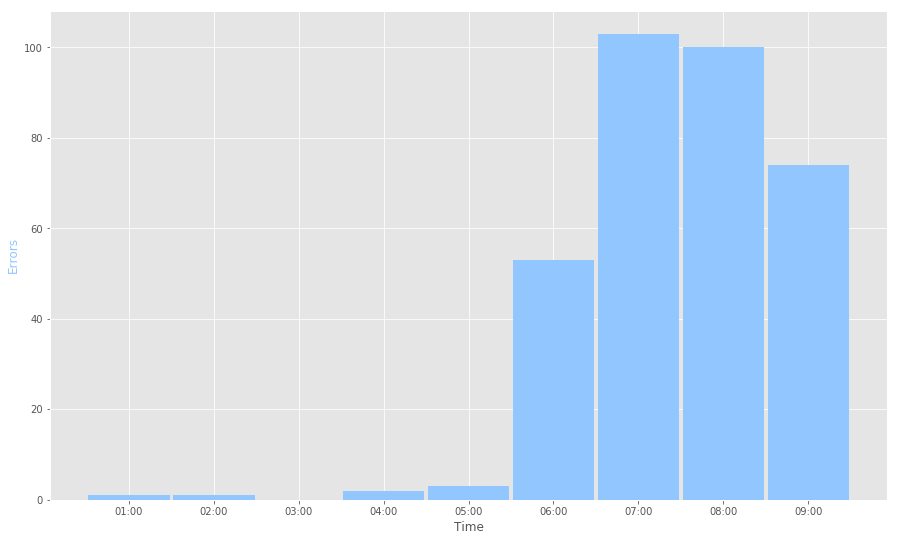

In [47]:
barit(hdf, )

In [48]:
mdf = pd.DataFrame()
mdf['user'] = udf.user.resample('T').count()
mdf.head()

,user
time,
2018-01-29 01:46:00,1
2018-01-29 01:47:00,0
2018-01-29 01:48:00,0
2018-01-29 01:49:00,0
2018-01-29 01:50:00,0


bar width: 0.04


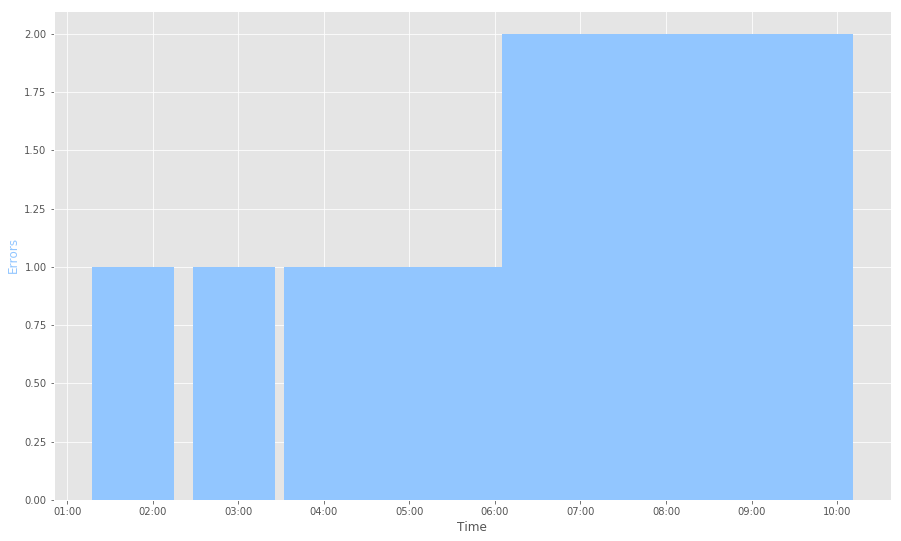

In [49]:
barit(mdf, )

bar width: 0.0006


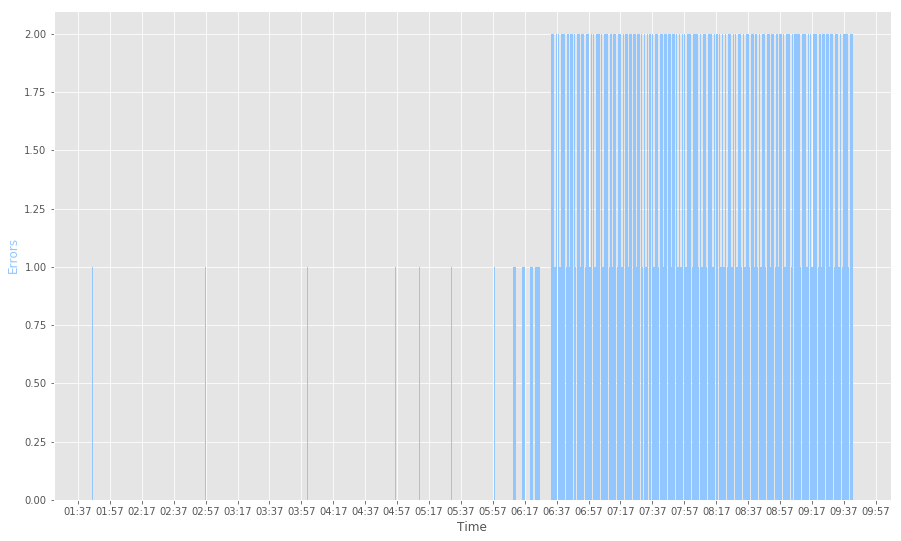

In [50]:
barit(mdf, 0.0006)

bar width: 0.0003


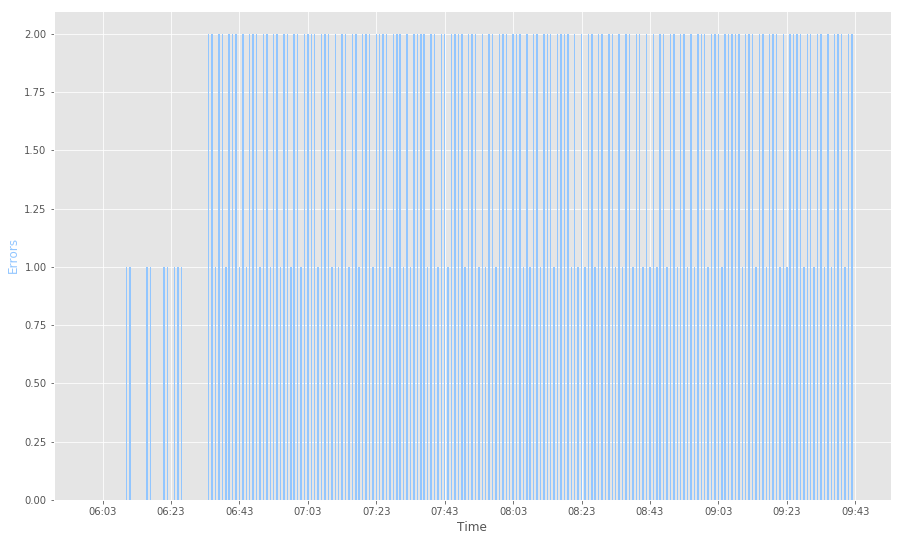

In [51]:
barit(mdf[datetime(2018, 1, 29, 6):], 0.0003) #datetime(2018, 1, 29, 9, 41, 27)

bar width: 0.0002


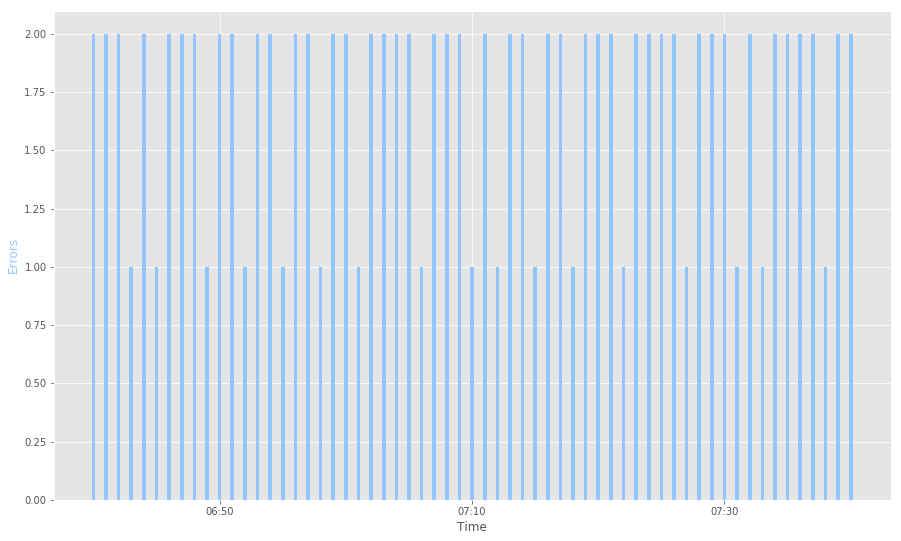

In [52]:
barit(mdf[datetime(2018, 1, 29, 6, 40):datetime(2018, 1, 29, 7, 40)], 0.0002)

------------------------------

Try Seaborn /sns

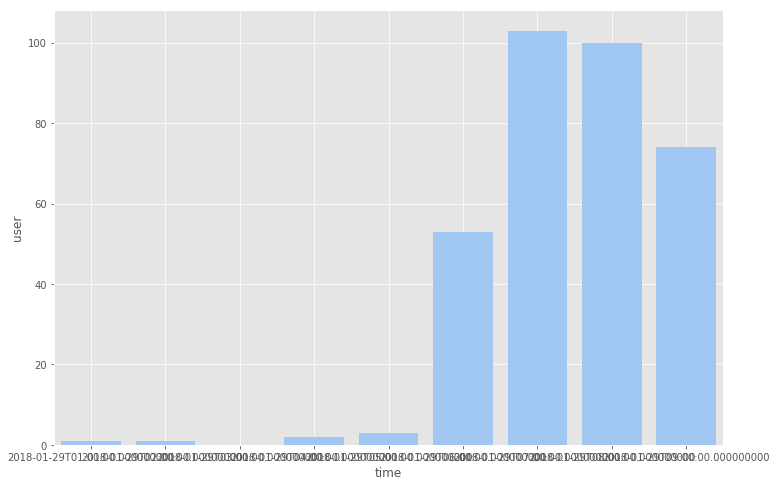

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(hdf.index, hdf.user, color="b")
plt.grid(True)
plt.show()

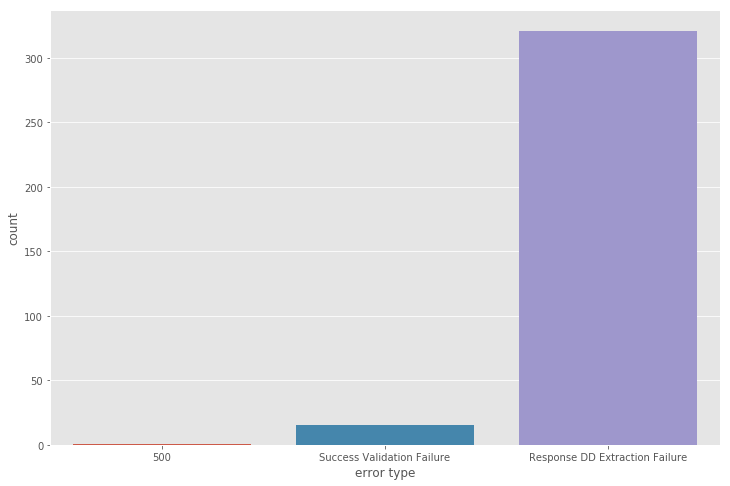

In [28]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot('error type', data=udf) #, size=6, aspect=1.5)#, ax=ax[0,0])
# sns.factorplot( x=udf.user, data=udf, kind="count", size=6, aspect=1.5)#, ax=ax[0,0])
# ax.set_xticklabels('errors') #, step=2)

The next example from Seaborn gallery differs from what I need:
* "time" (i.e. "year") in the planets dataset is not an index, rather a category
* ultimately I want to count individual error types, rather than just the total errors

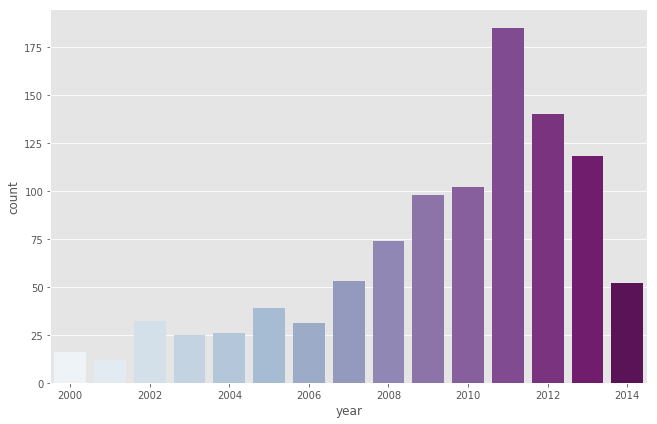

In [29]:
planets = sns.load_dataset("planets")
planets.head()

years = np.arange(2000, 2015)
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

In [30]:
udf.head()

,user,uj,step,cycle,error type,error cause,cause message/ddi
time,,,,,,,
2018-01-29 01:46:29,9,Open and Assign CM WO as Supervisor,Select WO,0,500,500,NaN
2018-01-29 02:57:04,9,Open and Assign CM WO as Supervisor,Save,46,Success Validation Failure,operation resulted in a table with zero rows,searchterm: Record has been saved.
2018-01-29 04:01:16,9,Open and Assign CM WO as Supervisor,Save,88,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...
2018-01-29 04:56:36,9,Open and Assign CM WO as Supervisor,Save,126,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...
2018-01-29 05:11:33,9,Open and Assign CM WO as Supervisor,Save,136,Success Validation Failure,Warning Message,BMXAA8229W - Record WORKORDER : Site=WW Work ...


In [31]:
hdf = pd.DataFrame()
hdf['user'] = udf.user.resample('H').count()
hdf

,user
time,
2018-01-29 01:00:00,1
2018-01-29 02:00:00,1
2018-01-29 03:00:00,0
2018-01-29 04:00:00,2
2018-01-29 05:00:00,3
2018-01-29 06:00:00,53
2018-01-29 07:00:00,103
2018-01-29 08:00:00,100
2018-01-29 09:00:00,74


In [32]:
tmpdf = pd.DataFrame()
tmpdf['error type'] = udf['error type']
tmpdf['cycle'] = udf['cycle'].astype(int)
tmpdf

,error type,cycle
time,,
2018-01-29 01:46:29,500,0
2018-01-29 02:57:04,Success Validation Failure,46
2018-01-29 04:01:16,Success Validation Failure,88
2018-01-29 04:56:36,Success Validation Failure,126
2018-01-29 05:11:33,Success Validation Failure,136
2018-01-29 05:31:07,Success Validation Failure,150
2018-01-29 05:58:38,Success Validation Failure,169
2018-01-29 06:10:28,Success Validation Failure,177
2018-01-29 06:11:47,Success Validation Failure,178


The ".groupby" works as follows: creates sor of "dictionary" (DataFrameGroupBy object) with keys matching the groups, and each value in the dictionary is a DataFrame with the corresponding rows from the original DF.

In [33]:
grouped_df = tmpdf.groupby('error type')
for key, item in grouped_df:
    print(grouped_df.get_group(key), '\n\n')

                    error type  cycle
time                                 
2018-01-29 01:46:29        500      0 


                                         error type  cycle
time                                                      
2018-01-29 06:34:15  Response DD Extraction Failure    196
2018-01-29 06:34:44  Response DD Extraction Failure    197
2018-01-29 06:35:24  Response DD Extraction Failure    198
2018-01-29 06:35:51  Response DD Extraction Failure    199
2018-01-29 06:36:24  Response DD Extraction Failure    200
2018-01-29 06:37:05  Response DD Extraction Failure    201
2018-01-29 06:37:38  Response DD Extraction Failure    202
2018-01-29 06:38:12  Response DD Extraction Failure    203
2018-01-29 06:38:52  Response DD Extraction Failure    204
2018-01-29 06:39:32  Response DD Extraction Failure    205
2018-01-29 06:40:02  Response DD Extraction Failure    206
2018-01-29 06:40:37  Response DD Extraction Failure    207
2018-01-29 06:41:09  Response DD Extraction Failure    20

Applying a function to the DataFrameGroupBy object, causes it to be "reduced" to a regular DataFrame - prior dict keys are now indexes and the rows values are collapsed

In [34]:
summed = grouped_df.sum()
print(type(summed))
summed

<class 'pandas.core.frame.DataFrame'>


,cycle
error type,
500,0
Response DD Extraction Failure,114276
Success Validation Failure,2375


Applying `.resample(<period_encoding>)`, generally results in object that cannot be directly viewed (yet has index). Only after applyng additional function, the resulting object is a Dataframe.

In [35]:
resampled = tmpdf.resample('H')
print(resampled.index)
# resampled.loc[resampled.index[0]]
# resampled.iloc[0]

resampled_mean = tmpdf.resample('H').mean()
resampled_mean

DatetimeIndex(['2018-01-29 01:00:00', '2018-01-29 02:00:00',
               '2018-01-29 03:00:00', '2018-01-29 04:00:00',
               '2018-01-29 05:00:00', '2018-01-29 06:00:00',
               '2018-01-29 07:00:00', '2018-01-29 08:00:00',
               '2018-01-29 09:00:00'],
              dtype='datetime64[ns]', name='time', freq='H')


/home/bob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


,cycle
time,
2018-01-29 01:00:00,0.000000
2018-01-29 02:00:00,46.000000
2018-01-29 03:00:00,NaN
2018-01-29 04:00:00,107.000000
2018-01-29 05:00:00,151.666667
2018-01-29 06:00:00,211.886792
2018-01-29 07:00:00,291.000000
2018-01-29 08:00:00,392.500000
2018-01-29 09:00:00,479.500000


Applying `.resample()` on top of a grouped object, gives a DatetimeIndexResamplerGroupby object. The key difference is that now there is MuliIndex.

In [36]:
resampled = grouped_df.resample('H')
print(resampled.index)
resampled_mean = grouped_df.resample('H').mean()
resampled_mean

MultiIndex(levels=[['500', 'Response DD Extraction Failure', 'Success Validation Failure'], [2018-01-29 01:00:00, 2018-01-29 02:00:00, 2018-01-29 03:00:00, 2018-01-29 04:00:00, 2018-01-29 05:00:00, 2018-01-29 06:00:00, 2018-01-29 07:00:00, 2018-01-29 08:00:00, 2018-01-29 09:00:00]],
           labels=[[0, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 5, 6, 7, 8, 1, 2, 3, 4, 5]],
           names=['error type', 'time'])


/home/bob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


cycle
error type                     time                           
500                            2018-01-29 01:00:00    0.000000
Response DD Extraction Failure 2018-01-29 06:00:00  217.500000
                               2018-01-29 07:00:00  291.000000
                               2018-01-29 08:00:00  392.500000
                               2018-01-29 09:00:00  479.500000
Success Validation Failure     2018-01-29 02:00:00   46.000000
                               2018-01-29 03:00:00         NaN
                               2018-01-29 04:00:00  107.000000
                               2018-01-29 05:00:00  151.666667
                               2018-01-29 06:00:00  184.444444

In [37]:
ndf = tmpdf.groupby('error type').resample('H').count().unstack('error type')
ndf

error type                                 \
error type                 500 Response DD Extraction Failure   
time                                                            
2018-01-29 01:00:00        1.0                            NaN   
2018-01-29 02:00:00        NaN                            NaN   
2018-01-29 03:00:00        NaN                            NaN   
2018-01-29 04:00:00        NaN                            NaN   
2018-01-29 05:00:00        NaN                            NaN   
2018-01-29 06:00:00        NaN                           44.0   
2018-01-29 07:00:00        NaN                          103.0   
2018-01-29 08:00:00        NaN                          100.0   
2018-01-29 09:00:00        NaN                           74.0   

                                               cycle  \
error type          Success Validation Failure   500   
time                                                   
2018-01-29 01:00:00                        NaN   1.0   
2018-01-29 02:00:00                        1.0   NaN   
2018-01-29 03:00:00                        0.0   NaN   
2018-01-29 04:00:00                        2.0   NaN   
2018-01-29 05:00:00                        3.0   NaN   
2018-01-29 06:00:00                        9.0   NaN   
2018-01-29 07:00:00                        NaN   NaN   
2018-01-29 08:00:00                        NaN   NaN   
2018-01-29 09:00:00                        NaN   NaN   

                                                                               
error type          Response DD Extraction Failure Success Validation Failure  
time                                                                           
2018-01-29 01:00:00                            NaN                        NaN  
2018-01-29 02:00:00                            NaN                        1.0  
2018-01-29 03:00:00                            NaN                        0.0  
2018-01-29 04:00:00                            NaN                        2.0  
2018-01-29 05:00:00                            NaN                        3.0  
2018-01-29 06:00:00                           44.0                        9.0  
2018-01-29 07:00:00                          103.0                        NaN  
2018-01-29 08:00:00                          100.0                        NaN  
2018-01-29 09:00:00                           74.0                        NaN

The above case where we used the cycle as nummeric value is not ideal - changing to just error_type

In [38]:
tmpdf = pd.DataFrame()
tmpdf['error type'] = udf['error type']
tmpdf

,error type
time,
2018-01-29 01:46:29,500
2018-01-29 02:57:04,Success Validation Failure
2018-01-29 04:01:16,Success Validation Failure
2018-01-29 04:56:36,Success Validation Failure
2018-01-29 05:11:33,Success Validation Failure
2018-01-29 05:31:07,Success Validation Failure
2018-01-29 05:58:38,Success Validation Failure
2018-01-29 06:10:28,Success Validation Failure
2018-01-29 06:11:47,Success Validation Failure


Here `.unstack()` "pivots" the index based on the error_type values to columns

In [39]:
ndf = tmpdf.groupby('error type').resample('H').count().unstack('error type')
ndf

error type                                 \
error type                 500 Response DD Extraction Failure   
time                                                            
2018-01-29 01:00:00        1.0                            NaN   
2018-01-29 02:00:00        NaN                            NaN   
2018-01-29 03:00:00        NaN                            NaN   
2018-01-29 04:00:00        NaN                            NaN   
2018-01-29 05:00:00        NaN                            NaN   
2018-01-29 06:00:00        NaN                           44.0   
2018-01-29 07:00:00        NaN                          103.0   
2018-01-29 08:00:00        NaN                          100.0   
2018-01-29 09:00:00        NaN                           74.0   

                                                
error type          Success Validation Failure  
time                                            
2018-01-29 01:00:00                        NaN  
2018-01-29 02:00:00                        1.0  
2018-01-29 03:00:00                        0.0  
2018-01-29 04:00:00                        2.0  
2018-01-29 05:00:00                        3.0  
2018-01-29 06:00:00                        9.0  
2018-01-29 07:00:00                        NaN  
2018-01-29 08:00:00                        NaN  
2018-01-29 09:00:00                        NaN

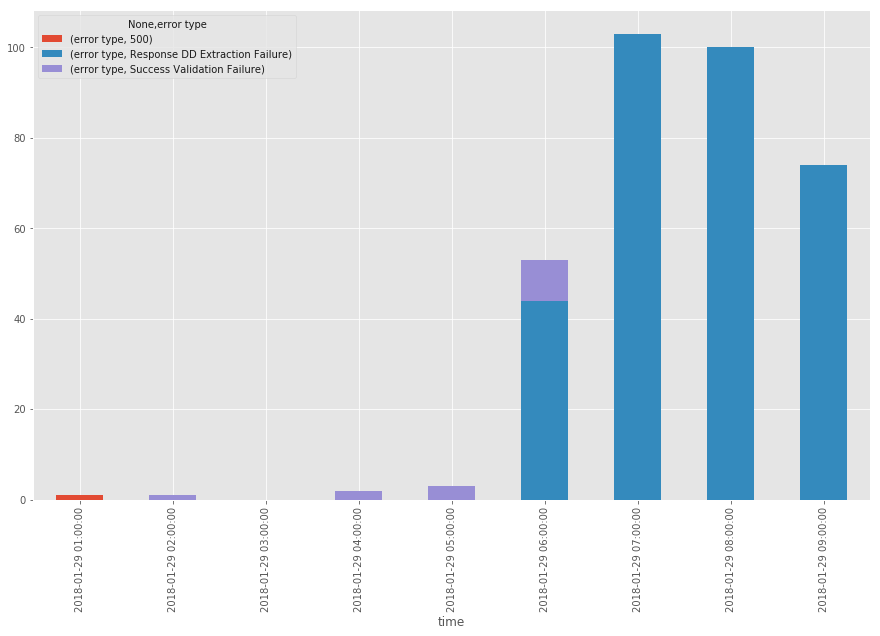

In [40]:
ndf.plot.bar(stacked=True)

In [41]:
def bar_categorical(udf, feature, freq='H'):
    tmpdf = pd.DataFrame()
    tmpdf[feature] = udf[feature]
    ndf = tmpdf.groupby(feature).resample(freq).count().unstack(feature)
    ndf.plot.bar(stacked=True)

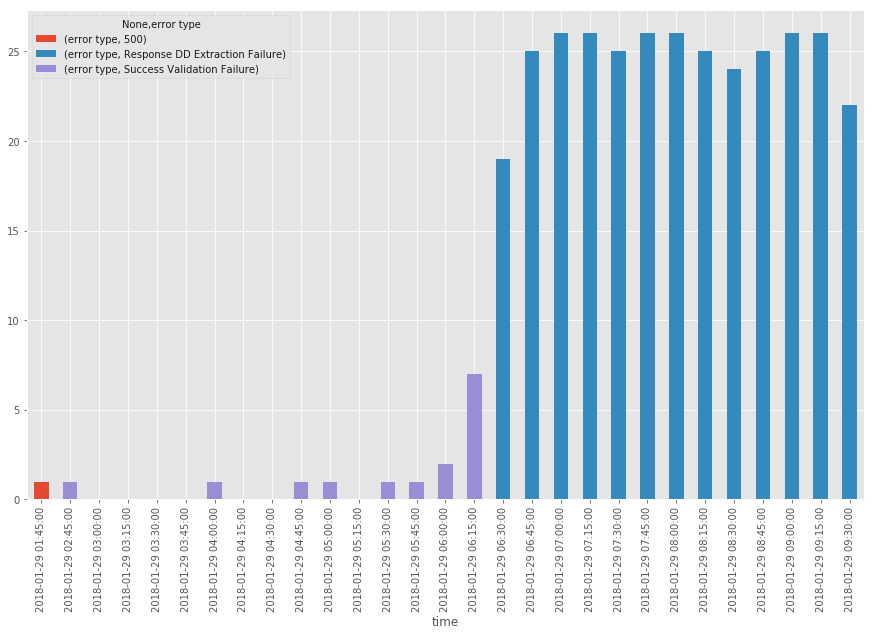

In [43]:
# udf = vusers['0014'].show_errors()
# udf.index = pd.to_datetime(udf.time, errors='coerce')
bar_categorical(udf, 'error type', '15T')

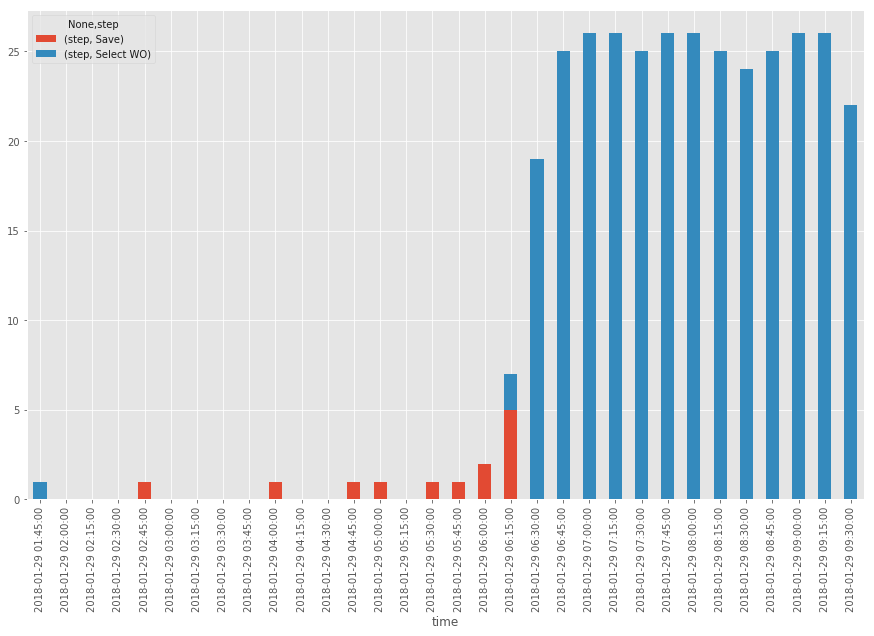

In [44]:
bar_categorical(udf, 'step', '15T')

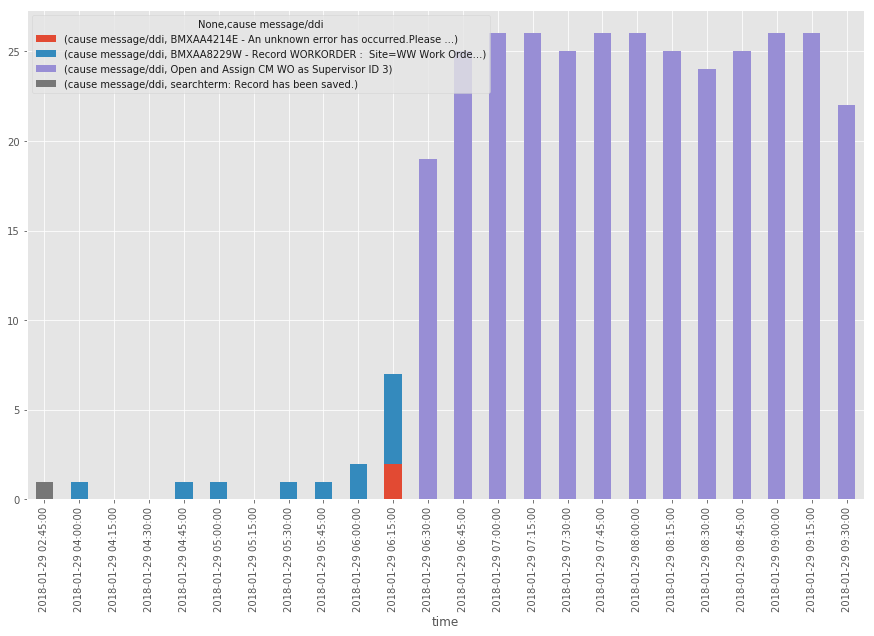

In [45]:
bar_categorical(udf, 'cause message/ddi', '15T')